# Task 3: Decision Tree Classifier

Build a decision tree model to predict whether a customer will subscribe to a term deposit (y: yes/no) based on demographic and behavioral attributes.

Step 1: Load and Preview Dataset

In [1]:
import pandas as pd

df = pd.read_csv("bank_marketing_mock.csv")
print(df.shape)
df.head()

(1000, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,56,blue-collar,single,secondary,no,8669,no,no,cellular,15,apr,3306,4,41,7,failure,no
1,69,blue-collar,divorced,tertiary,no,2749,no,yes,cellular,25,dec,2724,22,89,5,unknown,no
2,46,admin.,single,primary,no,1505,yes,no,cellular,18,nov,4801,22,27,4,failure,no
3,32,retired,single,tertiary,no,9667,yes,no,cellular,18,apr,233,37,55,1,failure,yes
4,60,entrepreneur,divorced,primary,no,2529,no,no,cellular,7,oct,1391,39,99,6,unknown,no


Step 2: Preprocessing

In [2]:
# Binary encoding for target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and labels
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Step 3: Train Decision Tree Model

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.81
[[237  16]
 [ 41   6]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       253
           1       0.27      0.13      0.17        47

    accuracy                           0.81       300
   macro avg       0.56      0.53      0.53       300
weighted avg       0.76      0.81      0.78       300



Step 4: Visualize Tree

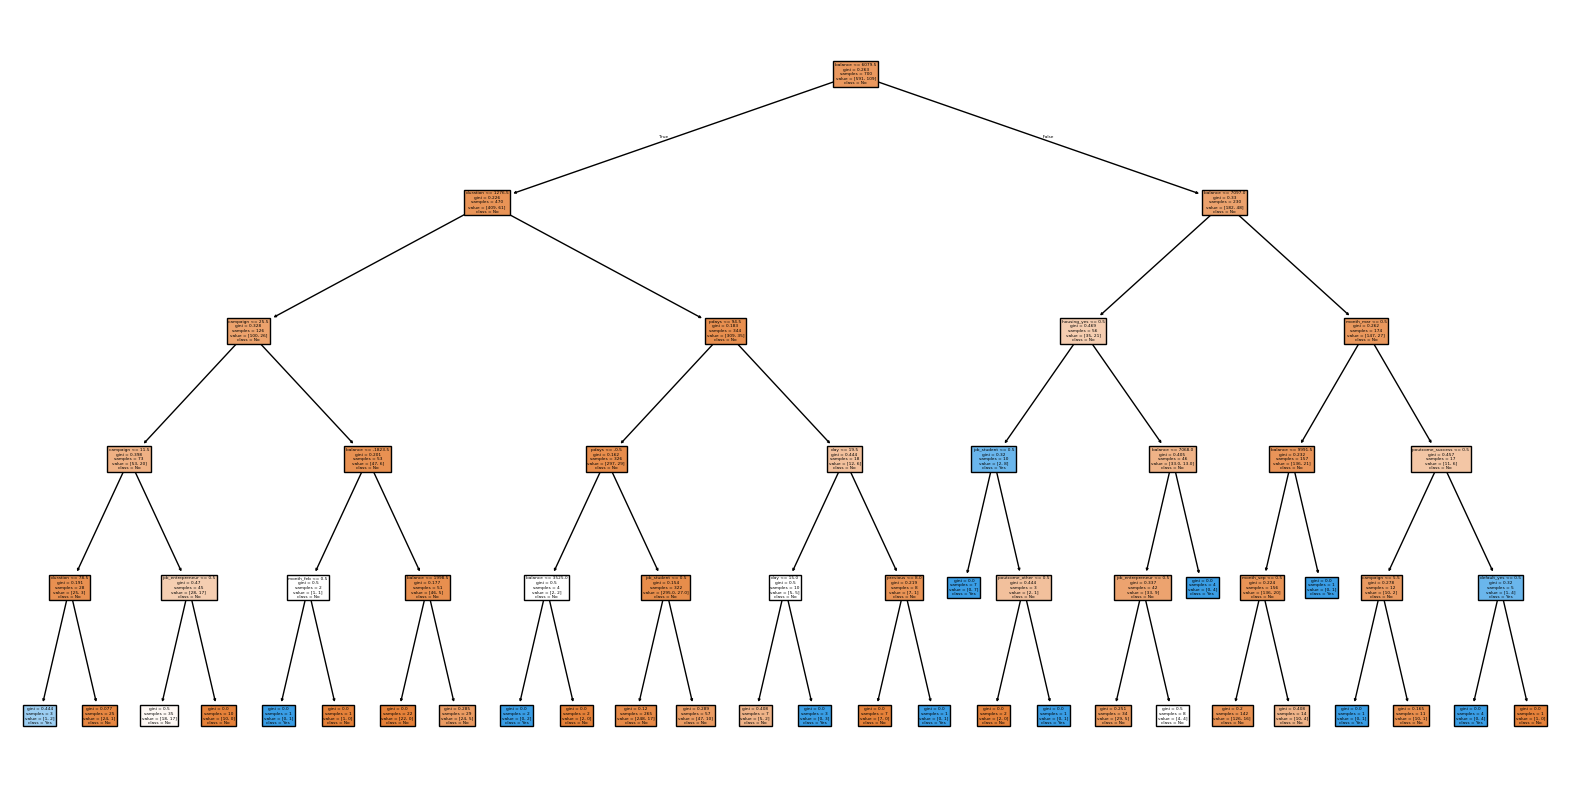

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
